# Statistical Analysis

[This notebook](https://github.com/dattalab/keypoint-moseq/blob/main/docs/source/analysis.ipynb) contains routines for analyzing the output of keypoint-MoSeq.

```{note}
The interactive widgets require jupyterlab launched from the `keypoint_moseq` environment. They will not work properly in jupyter notebook.
```


## Setup

We assume you have already have keypoint-MoSeq outputs that are organized as follows.
```
<project_dir>/               ** current working directory
└── <model_name>/            ** model directory
    ├── results.h5           ** model results
    └── grid_movies/         ** [Optional] grid movies folder
```
Use the code below to enter in your project directory and model name.

In [1]:
import keypoint_moseq as kpms

#project_dir='LDOPA_DLC' # the full path to the project directory
#model_name='2024_04_30-16_52_29' # name of model to analyze (e.g. something like `2023_05_23-15_19_03`)

#project_dir='6OHDA' # the full path to the project directory
#model_name='' # name of model to analyze (e.g. something like `2023_05_23-15_19_03`)

#project_dir='MitoPark3age data' # the full path to the project directory
#model_name='' # name of model to analyze (e.g. something like `2023_05_23-15_19_03`)

#project_dir='6OHDA_DLC' # the full path to the project directory
#model_name='2024_05_14-16_53_08' # name of model to analyze (e.g. something like `2023_05_23-15_19_03`)

project_dir='LDOPA_DLC' # the full path to the project directory
model_name='2024_04_30-16_52_29'


In [4]:
import jax_moseq

kpms.__file__

'C:\\Programming\\keypoint-moseq\\keypoint_moseq\\__init__.py'

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Duration distribution'}, xlabel='syllable duration (frames)', ylabel='probability'>)

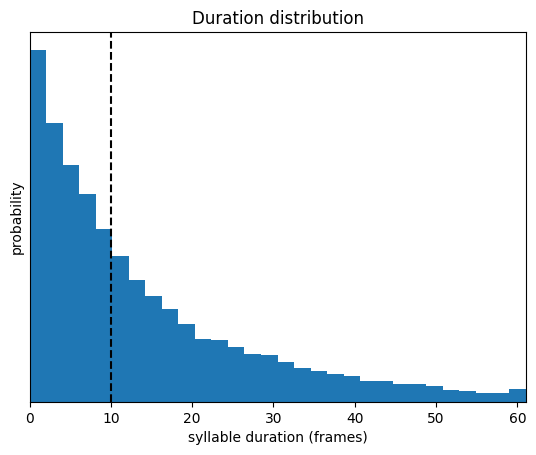

In [6]:
import matplotlib.pyplot as plt


kpms.plot_duration_distribution(project_dir, model_name)
#plt.xticks(ticks=range(0,66,6), labels=[k/10 for k in range(0,22,2)])
#plt.xlabel('syllable duration (sec)')

In [14]:
import matplotlib.pyplot as plt
import os

def save_analysis_figure(fig, plot_name, project_dir, model_name, save_dir):
    """Save an analysis figure.

    The figure is saved as both a .png and .pdf, either to `save_dir` if it is
    provided, or else to `project_dir/model_name/figures`.
    """
    if save_dir is None:
        save_dir = os.path.join(project_dir, model_name, "figures")
    os.makedirs(save_dir, exist_ok=True)
    save_path = os.path.join(save_dir, plot_name)
    fig.savefig(save_path + ".png", dpi=300)
    fig.savefig(save_path + ".svg", dpi=300)
    print(f"Saved figure to {save_path}.png")



## Assign Groups

The goal of this step is to assign group labels (such as "mutant" or "wildtype") to each recording. These labels are important later for performing group-wise comparisons.
- The code below creates a table called `{project_dir}/index.csv` and launches a widget for editing the table. To use the widget:
    - Click cells in the "group" column and enter new group labels.
    - Hit `Save group info` when you're done.
- **If the widget doesn't appear**, you also edit the table directly in Excel or LibreOffice Calc.

In [5]:
kpms.interactive_group_setting(project_dir, model_name)

Row
    [0] Tabulator(editors={'name': None, ...}, show_index=False, titles={'name': 'recording name',...}, value=              ..., widths={'name': 400})
    [1] Column
        [0] Button(button_type='primary', name='Save group info')

## Generate dataframes

Generate a pandas dataframe called `moseq_df` that contains syllable labels and kinematic information for each frame across all the recording sessions. 

In [2]:
moseq_df = kpms.compute_moseq_df(project_dir, model_name, smooth_heading=True) 
moseq_df

name  centroid_x  \
0       mj_11_24_58_ncb1612-convertedDLC_resnet50_MoSe...  346.145052   
1       mj_11_24_58_ncb1612-convertedDLC_resnet50_MoSe...  346.001009   
2       mj_11_24_58_ncb1612-convertedDLC_resnet50_MoSe...  345.107154   
3       mj_11_24_58_ncb1612-convertedDLC_resnet50_MoSe...  345.963441   
4       mj_11_24_58_ncb1612-convertedDLC_resnet50_MoSe...  346.462816   
...                                                   ...         ...   
851022  mj_18_35_47_ncb1615-convertedDLC_resnet50_MoSe...   98.598367   
851023  mj_18_35_47_ncb1615-convertedDLC_resnet50_MoSe...   99.176675   
851024  mj_18_35_47_ncb1615-convertedDLC_resnet50_MoSe...   99.847096   
851025  mj_18_35_47_ncb1615-convertedDLC_resnet50_MoSe...   99.274810   
851026  mj_18_35_47_ncb1615-convertedDLC_resnet50_MoSe...   99.680552   

        centroid_y   heading  angular_velocity  velocity_px_s  syllable  \
0       280.046130 -1.786654          0.000000       0.000000        41   
1       281.464011 -1.779685          0.126286      42.755388        41   
2       281.420577 -1.736066          0.257375      26.847314        41   
3       282.097836 -1.736066          0.402489      32.752349        41   
4       281.792875 -1.735813          0.575879      17.553874        41   
...            ...       ...               ...            ...       ...   
851022  240.621898  1.886400          0.415217     148.629252         2   
851023  241.547016  1.903297          0.441081      32.730034         2   
851024  242.939053  1.985143          0.410634      46.352015         2   
851025  242.702831  1.985143          0.318558      18.573661         2   
851026  242.859220  1.985143          0.174211      13.045152         2   

        frame_index              group  onset  
0                 0           Mitopark   True  
1                 1           Mitopark  False  
2                 2           Mitopark  False  
3                 3           Mitopark  False  
4                 4           Mitopark  False  
...             ...                ...    ...  
851022        23383  Mitopark + L-Dopa  False  
851023        23384  Mitopark + L-Dopa  False  
851024        23385  Mitopark + L-Dopa  False  
851025        23386  Mitopark + L-Dopa  False  
851026        23387  Mitopark + L-Dopa  False  

[851027 rows x 10 columns]

Next generate a dataframe called `stats_df` that contains summary statistics for each syllable in each recording session, such as its usage frequency and its distribution of kinematic parameters.

In [5]:
stats_df = kpms.compute_stats_df(
    project_dir,
    model_name,
    moseq_df,
    min_frequency=0,       # threshold frequency for including a syllable in the dataframe
    groupby=['group', 'name'], # column(s) to group the dataframe by
    fps=30)                    # frame rate of the video from which keypoints were inferred

stats_df

save_dir = os.path.join(project_dir, model_name)
stats_df.to_csv(os.path.join(save_dir, 'stats_df_all_syllables.csv'), index=False)
print('Saved `stats_df` dataframe to', save_dir)

Saved `stats_df` dataframe to LDOPA_DLC\2024_04_30-16_52_29


In [16]:
#calculate the absolute number of occurences for multiple syllables

from itertools import product

for k in product(stats_df.name.unique(),stats_df.syllable.unique()):
    value = moseq_df.loc[(moseq_df.name == k[0]) & (moseq_df.syllable == k[1])].onset.sum()
    stats_df.loc[(stats_df.name == k[0]) & (stats_df.syllable == k[1]),'abs_number'] = value
stats_df

group                                               name  \
0     Control_12-14  2022-09-01_17-49-17_mito_park_12-14_weeks_1035...   
1     Control_12-14  2022-09-01_17-49-17_mito_park_12-14_weeks_1035...   
2     Control_12-14  2022-09-01_17-49-17_mito_park_12-14_weeks_1035...   
3     Control_12-14  2022-09-01_17-49-17_mito_park_12-14_weeks_1035...   
4     Control_12-14  2022-09-01_17-49-17_mito_park_12-14_weeks_1035...   
...             ...                                                ...   
1169   MitoPark_6-8  2023-01-03_11-31-29_mito_park_6-8w_ncb1282_res...   
1170   MitoPark_6-8  2023-01-03_11-31-29_mito_park_6-8w_ncb1282_res...   
1171   MitoPark_6-8  2023-01-03_11-31-29_mito_park_6-8w_ncb1282_res...   
1172   MitoPark_6-8  2023-01-03_11-31-29_mito_park_6-8w_ncb1282_res...   
1173   MitoPark_6-8  2023-01-03_11-31-29_mito_park_6-8w_ncb1282_res...   

      syllable  heading_mean  heading_std  heading_min  heading_max  \
0            0      0.119949     1.621267    -3.140976     3.141193   
1            1      0.042341     1.642521    -3.140032     3.140984   
2            2      0.272477     1.796085    -3.137573     3.137856   
3            3      0.149351     1.849791    -3.140767     3.136964   
4            4      0.554472     1.716892    -2.879164     2.795456   
...        ...           ...          ...          ...          ...   
1169        17     -1.129006     0.423545    -2.344659    -0.331505   
1170        18     -0.679906     1.696244    -3.138781     3.137187   
1171        19      0.193295     2.317596    -3.134610     3.066705   
1172        20     -0.149817     0.788448    -2.194179     3.056960   
1173        21     -1.749034     1.864553    -3.136578     3.139444   

      angular_velocity_mean  angular_velocity_std  angular_velocity_min  \
0                 -0.025735              9.742934           -188.419347   
1                  0.140866             10.444220           -187.678380   
2                 -0.427913             20.018144           -187.666606   
3                  0.132102             11.316842           -187.553295   
4                  0.435054             13.680526           -172.989726   
...                     ...                   ...                   ...   
1169               0.199550              1.457507             -3.957044   
1170              -1.156861             24.339012           -188.321539   
1171              -0.375106             20.239973           -144.476186   
1172              -0.460568              1.259577             -4.022800   
1173              -1.338604             25.406236           -188.176408   

      angular_velocity_max  velocity_px_s_mean  velocity_px_s_std  \
0               188.337259           45.828081          43.149594   
1               187.735936           61.946437          44.022201   
2               187.282689           62.418966          44.157195   
3               188.173275           45.407926          37.393780   
4               175.029086           27.699498          20.564007   
...                    ...                 ...                ...   
1169              3.550134           35.892231          22.445329   
1170            188.318619           21.005121          14.068586   
1171             76.113529           37.103099          29.159501   
1172              1.584583          139.684934          57.610865   
1173            188.090467           96.645790          70.273456   

      velocity_px_s_min  velocity_px_s_max  frequency  duration  abs_number  
0              0.382817         249.499154   0.233645  0.702196       425.0  
1              0.926117         237.278300   0.156679  0.440234       285.0  
2              0.644359         250.587884   0.122595  0.452317       223.0  
3              0.381476         226.632492   0.130291  0.620534       237.0  
4              1.062891         119.442392   0.034085  0.241398        62.0  
...                 ...                ...        ...       ...         ..

C:\ProgramData\anaconda3\envs\keypoint_moseq\lib\site-packages\seaborn\categorical.py:632: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

C:\ProgramData\anaconda3\envs\keypoint_moseq\lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Saved figure to MITOPARK_DLC\2024_05_23-17_43_55_e6-4e4\figures\Abs_num_spread.png


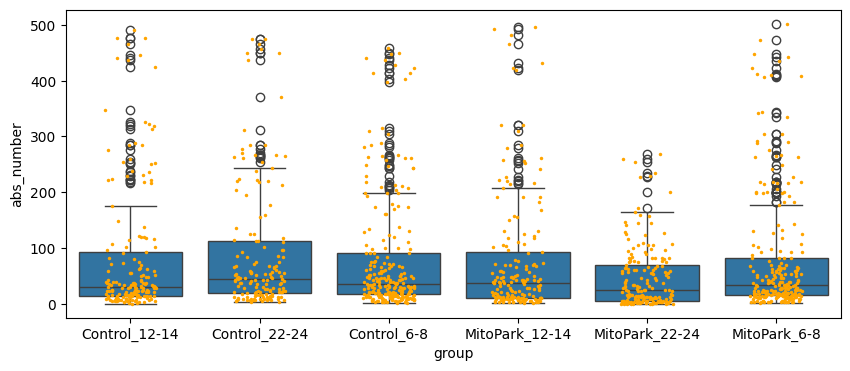

In [17]:
import seaborn as sns
figsize = (10,4)
fig, ax = plt.subplots(1, 1, figsize=figsize)
sns.boxplot(data=stats_df, x='group', y='abs_number', ax=ax)
sns.stripplot(data=stats_df, x='group', y='abs_number', color="orange", jitter=0.2, size=2.5, ax=ax)

save_analysis_figure(fig, 'Abs_num_spread', project_dir, model_name, save_dir=None)
#ax.set_ylim([0, 4])

### **Optional:** Save dataframes to csv
Uncomment the code below to save the dataframes as .csv files

In [4]:
import os

# # save moseq_df
save_dir = os.path.join(project_dir, model_name) # directory to save the moseq_df dataframe
moseq_df.to_csv(os.path.join(save_dir, 'moseq_df.csv'), index=False)
print('Saved `moseq_df` dataframe to', save_dir)

# # save stats_df
save_dir = os.path.join(project_dir, model_name)
stats_df.to_csv(os.path.join(save_dir, 'stats_df.csv'), index=False)
print('Saved `stats_df` dataframe to', save_dir)

Saved `moseq_df` dataframe to LDOPA_DLC\2024_04_30-16_52_29
Saved `stats_df` dataframe to LDOPA_DLC\2024_04_30-16_52_29


##  Label syllables

The goal of this step is name each syllable (e.g., "rear up" or "walk slowly").
- The code below creates an empty table at `{project_dir}/{model_name}/syll_info.csv` and launches an interactive widget for editing the table. To use the widget:
    - Select a syllable from the dropdown to display its grid movie.
    - Enter a name into the `label` column of the table (and optionally a short description too).
    - When you are done, hit `Save syllable info` at the bottom of the table.
- **If the widget doesn't appear**, you can also edit the file directly in Excel or LibreOffice Calc.

In [7]:
kpms.label_syllables(project_dir, model_name, moseq_df)

IndexError: index 0 is out of bounds for axis 0 with size 0

## Compare between groups

Test for statistically significant differences between groups of recordings. The code below takes a syllable property (e.g. frequency or duration), plots its disribution for each syllable across for each group, and also tests whether the property differs significantly between groups. The results are summarized in a plot that is saved to `{project_dir}/{model_name}/analysis_figures`.

There are two options for setting the order of syllables along the x-axis. When `order='stat'`, syllables are sorted by the mean value of the statistic. When `order='diff'`, syllables are sorted by the magnitude of difference between two groups that are determined by the `ctrl_group` and `exp_group` keywords. Note `ctrl_group` and `exp_group` are not related to significance testing.

In [21]:
syllables_to_plot = [2,6,7]
stats_df1 = stats_df.loc[stats_df.syllable.isin(syllables_to_plot)]
stats_df1.columns

Index(['group', 'name', 'syllable', 'heading_mean', 'heading_std',
       'heading_min', 'heading_max', 'angular_velocity_mean',
       'angular_velocity_std', 'angular_velocity_min', 'angular_velocity_max',
       'velocity_px_s_mean', 'velocity_px_s_std', 'velocity_px_s_min',
       'velocity_px_s_max', 'frequency', 'duration', 'abs_number'],
      dtype='object')

In [190]:
import pandas as pd

file = 'C:/Programming/keypoint-moseq/MITOPARK_DLC/2024_05_23-17_43_55_e6-4e4/stats_df.csv'
stats_df = pd.read_csv(file)
syllables_to_plot = list(range(21))
groups_to_plot = ['Control_6-8' ,'Control_12-14', 'Control_22-24']
#syllables_to_plot = [23,28,37,43,44,49,51]
stats_df1 = stats_df.loc[stats_df.syllable.isin(syllables_to_plot)]
stats_df1 = stats_df1.loc[stats_df.group.isin(groups_to_plot)]
stats_df1

group                                               name  \
0    Control_12-14  2022-09-01_17-49-17_mito_park_12-14_weeks_1035...   
1    Control_12-14  2022-09-01_17-49-17_mito_park_12-14_weeks_1035...   
2    Control_12-14  2022-09-01_17-49-17_mito_park_12-14_weeks_1035...   
3    Control_12-14  2022-09-01_17-49-17_mito_park_12-14_weeks_1035...   
4    Control_12-14  2022-09-01_17-49-17_mito_park_12-14_weeks_1035...   
..             ...                                                ...   
565    Control_6-8  2023-01-03_10-44-47_mito_park_6-8w_ncb1273_res...   
566    Control_6-8  2023-01-03_10-44-47_mito_park_6-8w_ncb1273_res...   
567    Control_6-8  2023-01-03_10-44-47_mito_park_6-8w_ncb1273_res...   
568    Control_6-8  2023-01-03_10-44-47_mito_park_6-8w_ncb1273_res...   
569    Control_6-8  2023-01-03_10-44-47_mito_park_6-8w_ncb1273_res...   

     syllable  heading_mean  heading_std  heading_min  heading_max  \
0           0      0.119949     1.621267    -3.140976     3.141193   
1           1      0.042341     1.642521    -3.140032     3.140984   
2           2      0.272477     1.796085    -3.137573     3.137856   
3           3      0.149351     1.849791    -3.140767     3.136964   
4           4      0.554472     1.716892    -2.879164     2.795456   
..        ...           ...          ...          ...          ...   
565        16     -1.291181     1.240827    -2.999010     2.988720   
566        17     -1.527505     0.939970    -3.106973     3.033457   
567        18     -0.135137     1.678225    -2.265482     2.201863   
568        19      0.119998     1.951031    -2.716083     2.996567   
569        20     -0.193469     0.453301    -1.405902     0.420773   

     angular_velocity_mean  angular_velocity_std  angular_velocity_min  \
0                -0.025735              9.742934           -188.419347   
1                 0.140866             10.444220           -187.678380   
2                -0.427913             20.018144           -187.666606   
3                 0.132102             11.316842           -187.553295   
4                 0.435054             13.680526           -172.989726   
..                     ...                   ...                   ...   
565              -0.210873              0.883010             -2.755904   
566              -1.460925             20.587203           -186.371413   
567              -0.036800              2.248441            -14.651268   
568               1.970042             43.223404           -183.163126   
569              -0.737852              1.055139             -3.521408   

     angular_velocity_max  velocity_px_s_mean  velocity_px_s_std  \
0              188.337259           45.828081          43.149594   
1              187.735936           61.946437          44.022201   
2              187.282689           62.418966          44.157195   
3              188.173275           45.407926          37.393780   
4              175.029086           27.699498          20.564007   
..                    ...                 ...                ...   
565              3.694048           79.548387          60.828780   
566              3.021862           34.304817          20.705183   
567             14.230836           16.766354           8.994283   
568            174.596634           67.893953          50.312653   
569              1.360849          111.041412          44.649717   

     velocity_px_s_min  velocity_px_s_max  frequency  duration  abs_number  
0             0.382817         249.499154   0.233645  0.702196       425.0  
1             0.926117         237.278300   0.156679  0.440234       285.0  
2             0.644359         250.587884   0.122595  0.452317       223.0  
3             0.381476         226.632492   0.130291  0.620534       237.0  
4             1.062891         119.442392   0.034085  0.241398        62.0  
..                 ...                ...        ...       ...         ...  
565           1.903727         265.944541   0.0070

C:\ProgramData\anaconda3\envs\keypoint_moseq\lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\ProgramData\anaconda3\envs\keypoint_moseq\lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\ProgramData\anaconda3\envs\keypoint_moseq\lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



No significant syllables found.
No significant syllables found.
No significant syllables found.
Saved figure to MITOPARK_DLC\2024_05_23-17_43_55_e6-4e4\figures\velocity_px_s_mean_stat_stats.png


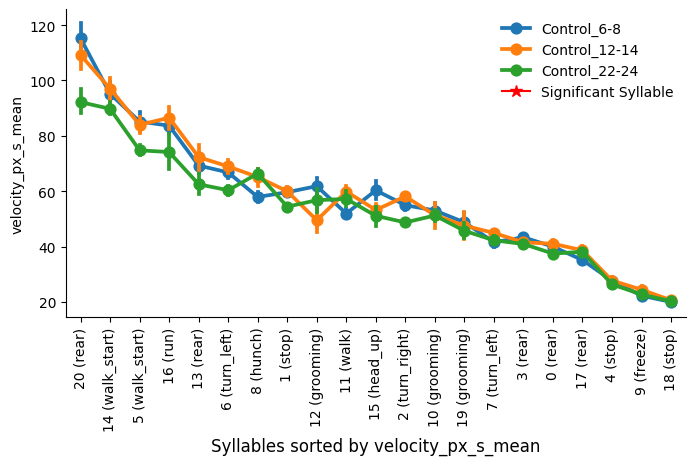

In [192]:
fig1, leg1 =kpms.plot_syll_stats_with_sem(
    stats_df1, project_dir, model_name,
    plot_sig=True,    # whether to mark statistical significance with a star
    thresh=0.05,      # significance threshold
    stat='velocity_px_s_mean', # statistic to be plotted (e.g. 'frequency', 'duration' or 'velocity_px_s_mean')
    stat_order='velocity_px_s_mean',
    order='stat',     # order syllables by overall frequency ("stat") or degree of difference ("diff")
    #ctrl_group='Control_22-24',   # name of the control group for statistical testing
    #exp_group='MitoPark_22-24',    # name of the experimental group for statistical testing
    figsize=(8, 4),   # figure size
    groups=['Control_6-8' ,'Control_12-14', 'Control_22-24'], # groups to be plotted,
    in_y = 0.02
);

#ax1 = plt.gca()
#ax1.set_ylim([0,3])

PearsonRResult(statistic=0.902769381579966, pvalue=2.1626507256193947e-08)

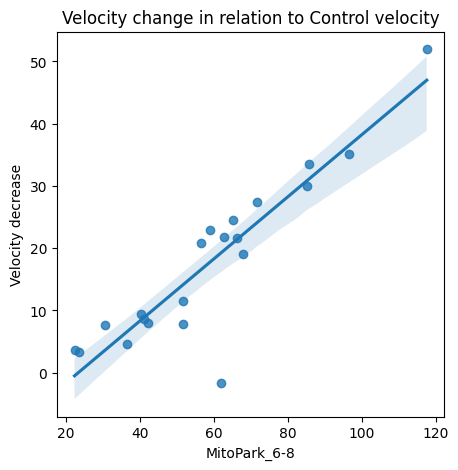

In [185]:
import seaborn as sns
import pandas as pd
import scipy.stats

#file = 'C:/Programming/keypoint-moseq/6OHDA_DLC/6ohda/stats_df.csv'
#stats_df = pd.read_csv(file)
stats_df = stats_df1.copy()
#syllables_to_plot = list(range(30))
groups_to_plot = ['MitoPark_6-8','MitoPark_12-14', 'MitoPark_22-24']
#stats_df = stats_df.loc[stats_df.syllable.isin(syllables_to_plot)]
#velocity = table['group','syllable','velocity_3d_mm_mean']
#frequency = table['frequency']

velocity1 = stats_df.loc[stats_df.group.isin([groups_to_plot[0]]),['syllable','velocity_px_s_mean']].rename(columns={'velocity_px_s_mean':groups_to_plot[0]}).pivot_table(index='syllable', dropna=True)
velocity2 = stats_df.loc[stats_df.group.isin([groups_to_plot[2]]),['syllable','velocity_px_s_mean']].rename(columns={'velocity_px_s_mean':groups_to_plot[2]}).pivot_table(index='syllable', dropna=True)
velocity = pd.concat([velocity1.reset_index(), velocity2.reset_index()], axis=1)
velocity['Velocity decrease'] = velocity[groups_to_plot[0]] - velocity[groups_to_plot[2]]

figsize = (5,5)
fig, ax = plt.subplots(1, 1, figsize=figsize)
plt.title('Velocity change in relation to Control velocity')
sns.regplot(data=velocity, x=groups_to_plot[0], y='Velocity decrease', ax=ax)
scipy.stats.pearsonr(x=velocity[groups_to_plot[0]], y=velocity['Velocity decrease'])
#save_analysis_figure(fig, 'Velocity_correlation-22-24', project_dir, model_name, save_dir=None)

<Axes: title={'center': 'Frequency change in relation to Control frequency'}, xlabel='MitoPark_6-8', ylabel='Frequency decrease'>

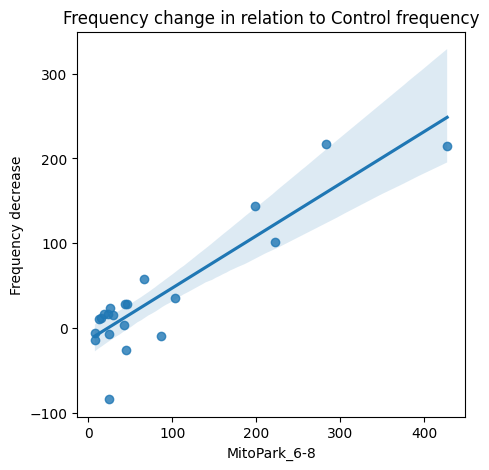

In [182]:
frequency1 = stats_df.loc[stats_df.group.isin([groups_to_plot[0]]),['syllable','abs_number']].rename(columns={'abs_number':groups_to_plot[0]}).pivot_table(index='syllable', dropna=True)
frequency2 = stats_df.loc[stats_df.group.isin([groups_to_plot[2]]),['syllable','abs_number']].rename(columns={'abs_number':groups_to_plot[2]}).pivot_table(index='syllable', dropna=True)
frequency = pd.concat([frequency1.reset_index(), frequency2.reset_index()], axis=1)
frequency['Frequency decrease'] = frequency[groups_to_plot[0]] - frequency[groups_to_plot[2]]
#frequency[groups_to_plot[0]] = velocity[groups_to_plot[0]]

figsize = (5,5)
fig, ax = plt.subplots(1, 1, figsize=figsize)
plt.title('Frequency change in relation to Control frequency')
sns.regplot(data=frequency, x=groups_to_plot[0], y='Frequency decrease', ax=ax)
#save_analysis_figure(fig, 'Frequency_correlation-22-24', project_dir, model_name, save_dir=None)

PearsonRResult(statistic=0.5036144569402256, pvalue=0.019937679432706277)

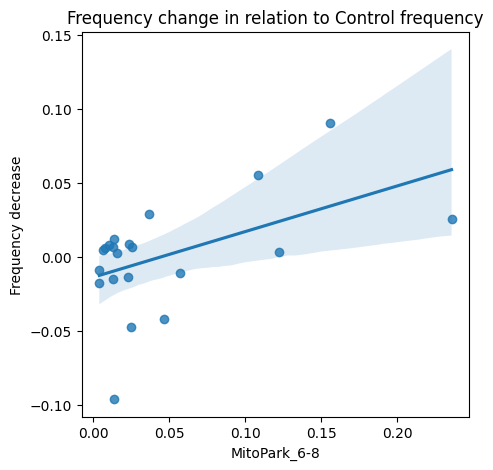

In [189]:
frequency1 = stats_df.loc[stats_df.group.isin([groups_to_plot[0]]),['syllable','frequency']].rename(columns={'frequency':groups_to_plot[0]}).pivot_table(index='syllable', dropna=True)
frequency2 = stats_df.loc[stats_df.group.isin([groups_to_plot[2]]),['syllable','frequency']].rename(columns={'frequency':groups_to_plot[2]}).pivot_table(index='syllable', dropna=True)
frequency = pd.concat([frequency1.reset_index(), frequency2.reset_index()], axis=1)
frequency['Frequency decrease'] = frequency[groups_to_plot[0]] - frequency[groups_to_plot[2]]
#frequency[groups_to_plot[0]] = velocity[groups_to_plot[0]]

figsize = (5,5)
fig, ax = plt.subplots(1, 1, figsize=figsize)
plt.title('Frequency change in relation to Control frequency')
sns.regplot(data=frequency, x=groups_to_plot[0], y='Frequency decrease', ax=ax)
scipy.stats.pearsonr(x=frequency[groups_to_plot[0]], y=frequency['Frequency decrease'])
#save_analysis_figure(fig, 'Frequency_correlation', project_dir, model_name, save_dir=None)

### Transition matrices
Generate heatmaps showing the transition frequencies between syllables.

Group(s): Control, Control + L-Dopa, Mitopark, Mitopark + L-Dopa
Saved figure to LDOPA_DLC\2024_04_30-16_52_29\figures\transition_matrices.png


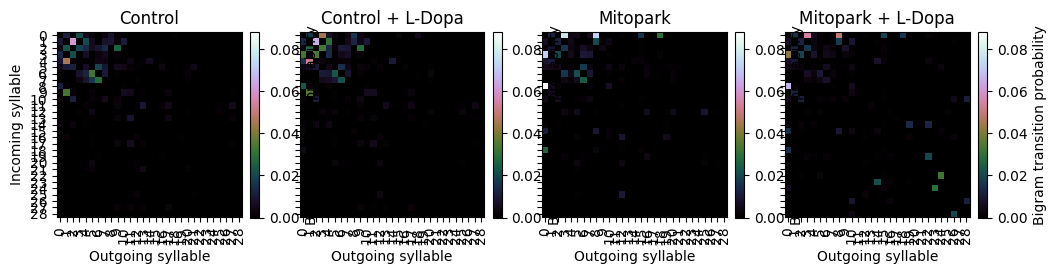

In [37]:
normalize='bigram' # normalization method ("bigram", "rows" or "columns")

trans_mats, usages, groups, syll_include=kpms.generate_transition_matrices(
    project_dir, model_name, normalize=normalize,
    min_frequency=0.005 # minimum syllable frequency to include
)    

kpms.visualize_transition_bigram(
    project_dir, model_name, groups, trans_mats, syll_include, normalize=normalize, 
    show_syllable_names=False # label syllables by index (False) or index and name (True)
)

In [ ]:
#Reorder syllables in the transition matrix

new_order = [0,1,5,3,10,6,2,8,9,4,11,7,12,13,14]

def rearrange_matrix(mats_list, new_order):
    new_mats_list = []
    for k in mats_list:
        k = k[:, new_order][new_order]
        new_mats_list.append(k)
    return new_mats_list

trans_mats_speed = rearrange_matrix(trans_mats, new_order)

kpms.visualize_transition_bigram(
    project_dir, model_name, [groups[0]], [trans_mats_speed[0]], syll_include, normalize=normalize, 
    show_syllable_names=False # label syllables by index (False) or index and name (True)
)



<Axes: >

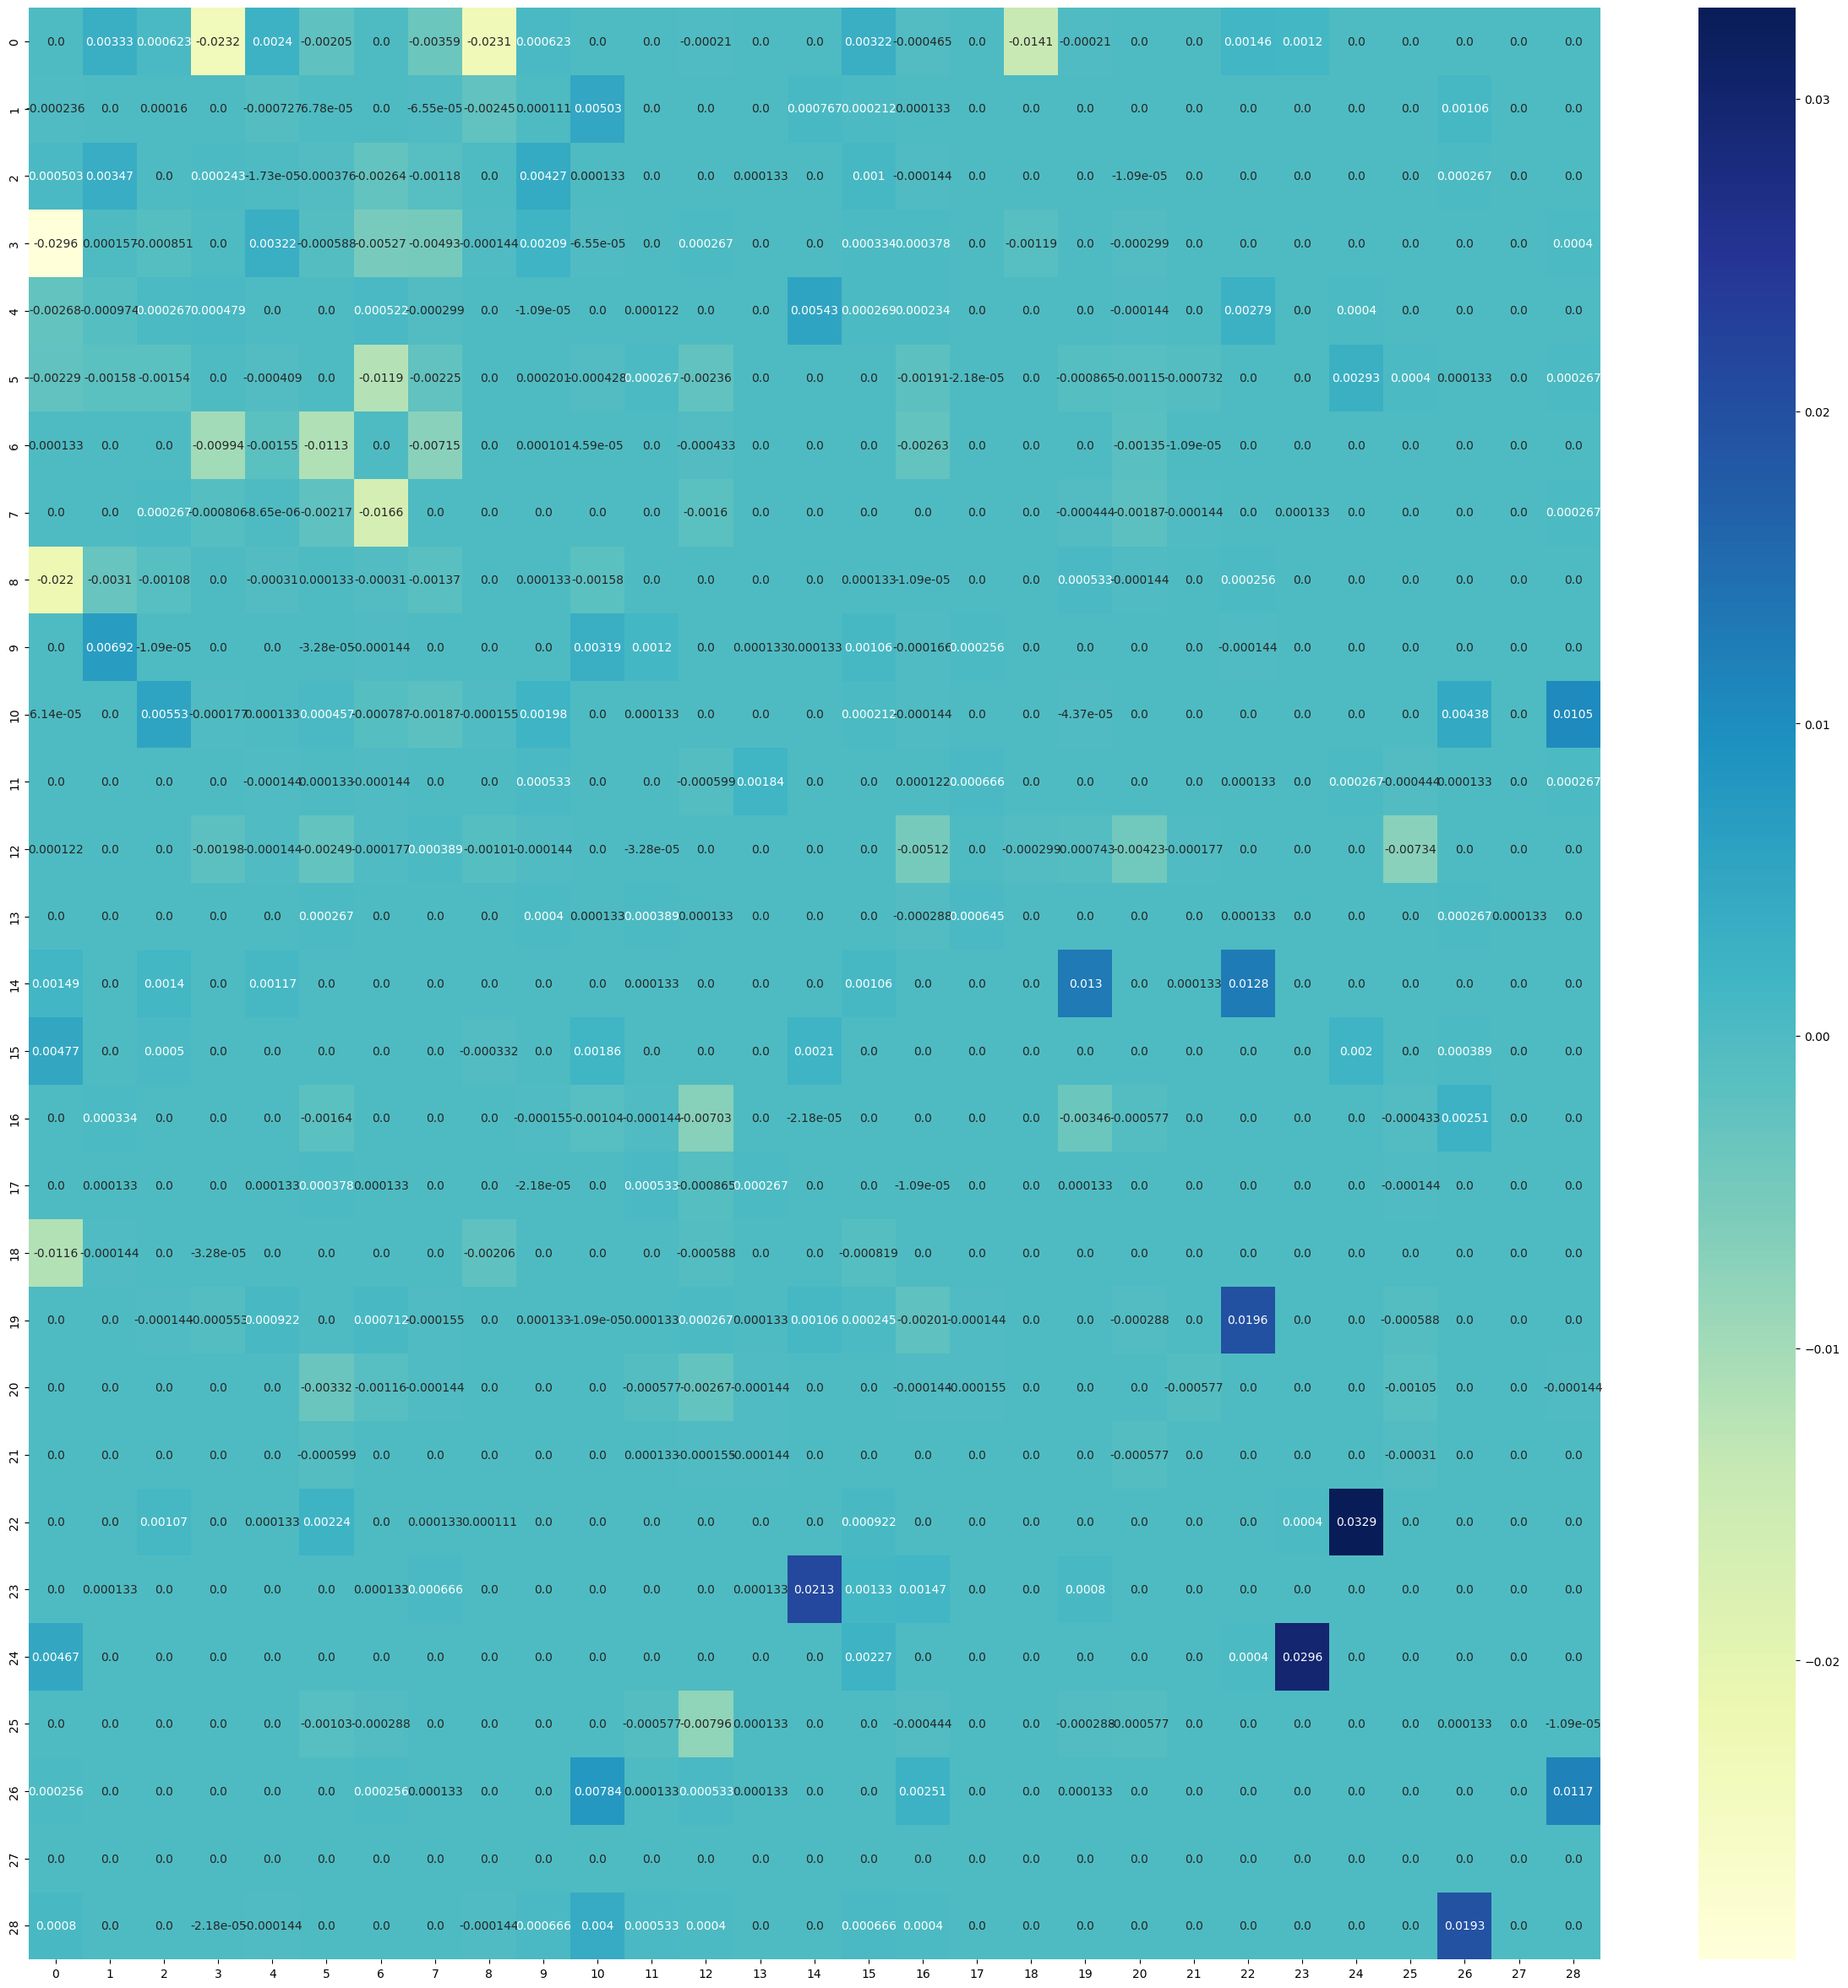

In [51]:
#Make a heatmap representing transition probabilities for one animal

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

figsize = (30,30)
fig, ax = plt.subplots(1, 1, figsize=figsize)
sns.heatmap(pd.DataFrame(trans_mats[3]-trans_mats[2]), cmap='YlGnBu', annot=True, fmt='.3', ax=ax)
#save_analysis_figure(fig, 'Transitions_Mitopark-22-24', project_dir, model_name, save_dir=None)

In [9]:
#save transition matrices for entropy analyses
# save the resulting transition matrix from each group as an h5

import h5py
import numpy as np

with h5py.File('transition_matrices.h5','w') as h5f:
    h5f.create_dataset("transitions", data=np.asarray(trans_mats) )
    h5f.create_dataset("usages", data=np.asarray(usages) )
    h5f.create_dataset("included", data=np.asarray(syll_include) )

### Syllable Transition Graph
Render transition rates in graph form, where nodes represent syllables and edges represent transitions between syllables, with edge width showing transition rate for each pair of syllables (secifically the max of the two transition rates in each direction).

Saved figure to LDOPA_DLC\2024_04_30-16_52_29\figures\transition_graphs.png


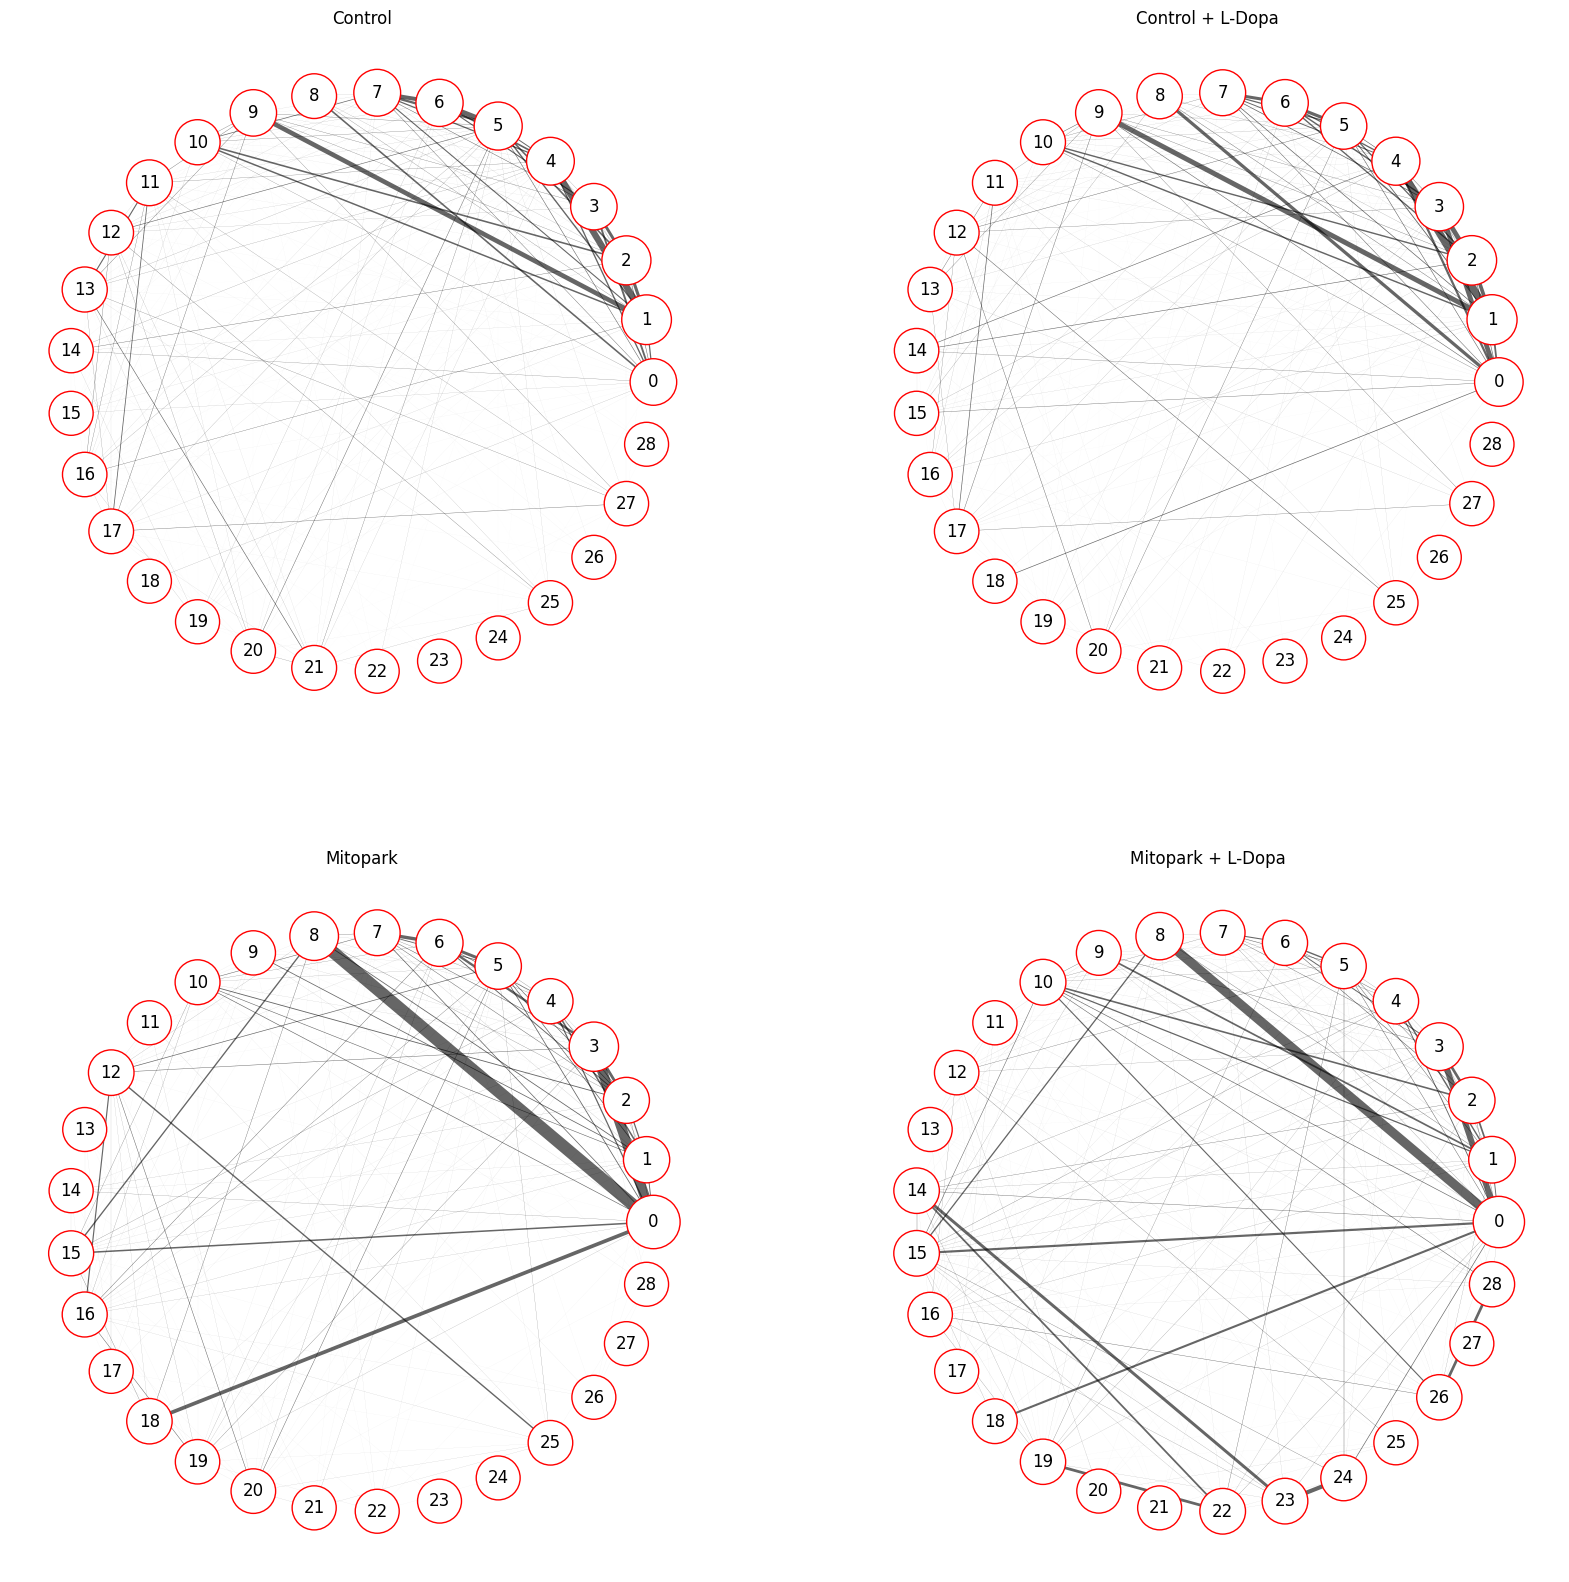

In [39]:
# Generate a transition graph for each single group

kpms.plot_transition_graph_group(
    project_dir, model_name, 
    groups, trans_mats, usages, syll_include, 
    layout='circular',        # transition graph layout ("circular" or "spring")
    show_syllable_names=False # label syllables by index (False) or index and name (True)
)

Saved figure to LDOPA_DLC\2024_04_30-16_52_29\figures\transition_graphs_diff.png


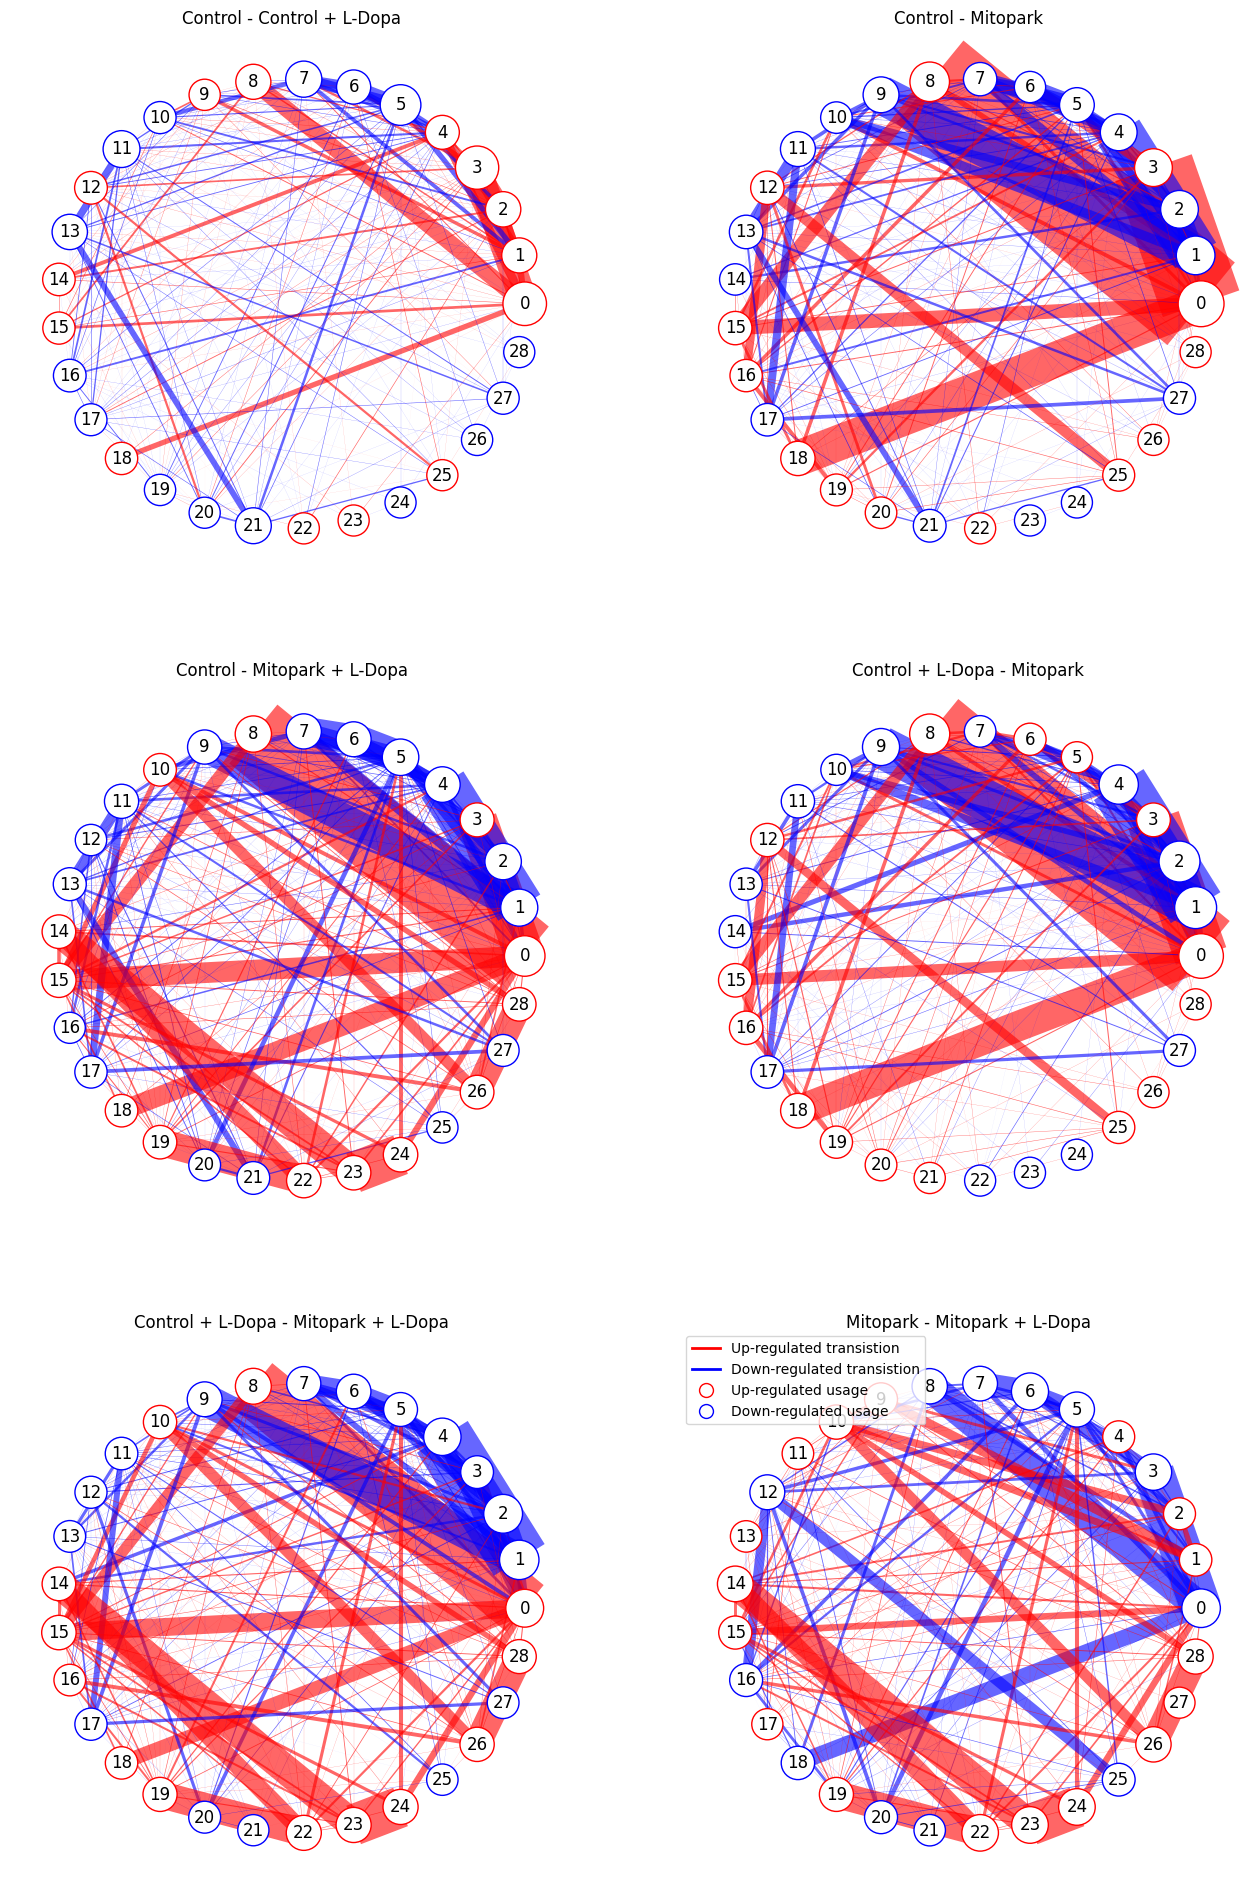

In [40]:
# Generate a difference-graph for each pair of groups.


kpms.plot_transition_graph_difference(project_dir, model_name, 
                                       groups, trans_mats,
                                      usages, syll_include, layout='circular') # transition graph layout ("circular" or "spring")

In [8]:
# Defining the functions to work with entropy matrices

import numpy as np
import scipy.linalg
import numpy as np
import pandas as pd
from os.path import join
from numpy import linalg as LA
from jax_moseq.utils import get_durations, get_frequencies



def local_entropy(tr_mat, truncate_syllable=40):
    """Computes the local entropy at each state of the MC defined by the transition
    probabilities P"""
    # TODO: Not optimal memory wise !!
    P = tr_mat[:truncate_syllable, :truncate_syllable]
    L = np.copy(P)
    L[P > 0] = np.log2(P[P > 0])
    K = np.dot(P, np.transpose(L))
    entropy_out = -1*np.diagonal(K)
    return entropy_out.reshape((P.shape[0], 1))


def entropy_rate(use_labels, use_tmxs, truncate_syllable=40, normalize='bigram',
                 smoothing=1.0, tm_smoothing=1.0):
    '''
    Computes entropy rate, base 2 using provided syllable labels. If
    syllable labels have not been re-labeled by usage, this function will do so.
    Parameters
    ----------
    use_labels (list or np.ndarray): a list of label arrays, where each entry in the list
            is an array of labels for one subject.
    use_tmxs (list or np.ndarray): a list of transition matrixes precalculated.
    truncate_syllable (int): maximum number of labels to keep for this calculation.
    normalize (str): the type of transition matrix normalization to perform. Options
            are: 'bigram', 'rows', or 'columns'.
    smoothing (float): a constant added to label usages before normalization
    tm_smoothing (float): a constant added to label transtition counts before normalization.
   
    Returns
    -------
    ent (list): list of entropy rates per syllable label
    '''
    labels = use_labels.copy()
    tmxs = use_tmxs.copy()
    ent = []
    for v in zip(labels, tmxs):
        usages = get_frequencies(v[0])
        usages = usages[:truncate_syllable] + smoothing
        usages /= usages.sum()

        tm = v[1] + tm_smoothing

        tm = tm[:truncate_syllable, :truncate_syllable]

        if normalize == 'bigram':
            tm /= tm.sum()
        elif normalize == 'rows':
            tm /= tm.sum(axis=1, keepdims=True)
        elif normalize == 'columns':
            tm /= tm.sum(axis=0, keepdims=True)

        entropy_rate = -np.sum(usages * tm * np.log2(tm))
        ent.append(entropy_rate)
    return ent

def entropy_rate2(use_labels, use_tmxs, truncate_syllable=40, normalize='bigram',
                 smoothing=1.0, tm_smoothing=1.0):
    '''
    Computes entropy rate, base 2 using provided syllable labels. If
    syllable labels have not been re-labeled by usage, this function will do so.
    Parameters
    ----------
    use_labels (list or np.ndarray): a list of label arrays, where each entry in the list
            is an array of labels for one subject.
    use_tmxs (list or np.ndarray): a list of transition matrixes precalculated.
    truncate_syllable (int): maximum number of labels to keep for this calculation.
    normalize (str): the type of transition matrix normalization to perform. Options
            are: 'bigram', 'rows', or 'columns'.
    smoothing (float): a constant added to label usages before normalization
    tm_smoothing (float): a constant added to label transtition counts before normalization.
   
    Returns
    -------
    ent (list): list of entropy rates per syllable label
    '''
    labels = use_labels.copy()
    tmxs = use_tmxs.copy()
    ent = []
    for v in zip(labels, tmxs):
        usages = get_frequencies(v[0])
        usages = usages[:truncate_syllable] + smoothing
        usages /= usages.sum()

        tm = v[1] + tm_smoothing

        tm = tm[:truncate_syllable, :truncate_syllable]

        if normalize == 'bigram':
            tm /= tm.sum()
        elif normalize == 'rows':
            tm /= tm.sum(axis=1, keepdims=True)
        elif normalize == 'columns':
            tm /= tm.sum(axis=0, keepdims=True)

        entropy_rate = -np.sum(tm * np.log2(tm))
        ent.append(entropy_rate)
    return ent

def labels_align(arraylist):
    outarr=np.ones((np.max([len(ps) for ps in arraylist]),len(arraylist)))*np.nan #define empty array
    for i,c in enumerate(arraylist):  #populate columns
        outarr[:len(c),i]=c

    return outarr

def labels_unique(arraylist):
    unique = []
    for i,c in enumerate(arraylist):
        unique.append(len(set(c)))

    return unique

def labels_transition(arraylist):
    changes = []
    for i,c in enumerate(arraylist):
        changes.append(len(np.where(c[:-1] != c[1:])[0])/(len(c)/30))

    return changes



In [60]:
#Calculating the local entropy for part of the matrix

np.sum(local_entropy(use_tmxs[2], truncate_syllable=20))

5.406410579107353

In [9]:
# open the resulting transition matrix from each group
import pandas as pd
import os
import matplotlib.pyplot as plt
import h5py
import numpy as np

with h5py.File('LDOPA_DLC/2024_04_30-16_52_29/transition_matrices.h5','r') as h5f:
    tmxs = h5f["transitions"][()]
    usgs = h5f["usages"][()]


index_file = os.path.join(project_dir, 'index.csv')
results_dict = kpms.load_results(project_dir, model_name)
index_data = pd.read_csv(index_file, index_col=False)
label_group = list(index_data.group.values)
recordings = list(index_data.name.values)

labels = [results_dict[recording]["syllable"] for recording in recordings]


Saved figure to LDOPA_DLC\2024_04_30-16_52_29\figures\Syllable_labels_Mitopark_short.png


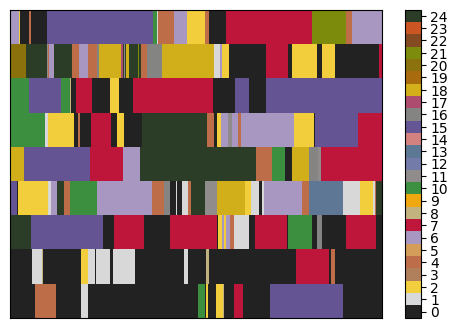

In [34]:
#get the entropy matrixes and syllable usages for certain group of animals
import matplotlib
import matplotlib.ticker as ticker
from matplotlib.colors import LinearSegmentedColormap

normalize='bigram' # normalization method ("bigram", "rows" or "columns")
plt_group = 'Mitopark'
syll_include = 25
use_labels = [lbl for lbl, grp in zip(labels, label_group) if grp == plt_group]
use_tmxs = kpms.get_transition_matrix(use_labels, normalize=normalize, combine=False)

arr=labels_align(use_labels).T


list_colors2 = ['olivedrab', 'goldenrod', 'red', 'steelblue', 'olivedrab',
                  'olivedrab', 'steelblue', 'red', 'goldenrod', 'olivedrab',
                  'goldenrod', 'olivedrab', 'steelblue', 'olivedrab', 'goldenrod',
                  'goldenrod', 'goldenrod', 'goldenrod', 'steelblue', 'steelblue',
                  'goldenrod','olivedrab','goldenrod','goldenrod','olivedrab',
                  'goldenrod','goldenrod', 'olivedrab', 'goldenrod']


list_syllables = ['turn', 'walk', 'rear', 'stop', 'turn',
                  'turn', 'stop', 'rear', 'walk', 'turn',
                  'run', 'turn', 'stop', 'turn', 'walk',
                  'walk', 'run', 'walk', 'stop', 'stop',
                  'walk','turn','walk','walk','turn',
                  'walk','walk', 'turn', 'walk']


kelly_colors =  ['#222222', '#F2F3F4', '#F3C300', '#875692', '#F38400', '#A1CAF1', '#BE0032', '#C2B280', '#F6A600',
                 '#008856', '#E68FAC', '#0067A5', '#F99379', '#604E97', '#848482', '#B3446C', '#DCD300', '#882D17', '#8DB600', '#654522', '#E25822', '#2B3D26']


cmap1=matplotlib.colors.ListedColormap(list_colors2, name='from_list', N=29)
cmap2=LinearSegmentedColormap.from_list("mycmap", kelly_colors, N=25)

figsize = (6,4)
fig, ax = plt.subplots(1, 1, figsize=figsize)
fig1 = plt.imshow(arr[:,500:1000], cmap=cmap2, vmin=0, vmax=25, aspect='auto', interpolation='none')
ax.set_xticks([])
ax.set_yticks([])
cb = plt.colorbar(fig1)
cb.ax.set_yticks([k+0.5 for k in range(25)])
cb.ax.set_yticklabels(k for k in range(25))
#cb.yaxis.set_major_formatter(ticker.NullFormatter())
#cb.yaxis.set_minor_locator(ticker.FixedLocator(list(k+0.5 for k in range(22))))
#cb.yaxis.set_minor_formatter(ticker.FixedFormatter(k for k in list_syllables))

save_analysis_figure(fig, 'Syllable_labels_Mitopark_short', project_dir, model_name, save_dir=None)


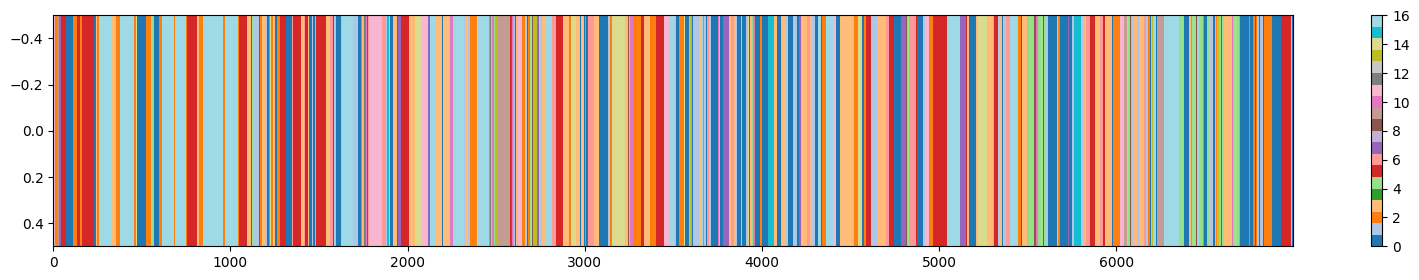

In [73]:
#need to get plot for first and last animals to make a live plot

syll_include = 22
use_labels = [labels[0]]
use_tmxs = kpms.get_transition_matrix(use_labels, normalize=normalize, combine=False)

arr=labels_align(use_labels).T
plt.figure(figsize=(20, 3)) 
plt.imshow(arr[:,:7000], cmap='tab20', vmin=0, vmax=16, aspect='auto', interpolation='none')
plt.colorbar()


In [37]:
behav_struct = pd.DataFrame(columns=['Transitions', 'Unique', 'Entropy', 'Entropy_transitions', 'Local Entropy', 'Group'])   #make a dataframe

In [41]:
plt_group = 'Mitopark + L-Dopa'
syll_include = 28
use_labels = [lbl for lbl, grp in zip(labels, label_group) if grp == plt_group]
use_tmxs = kpms.get_transition_matrix(use_labels, normalize=normalize, combine=False)

ent = entropy_rate(use_labels, use_tmxs, truncate_syllable=28, normalize='bigram', smoothing=1.0, tm_smoothing=1.0)
ent2 = entropy_rate2(use_labels, use_tmxs, truncate_syllable=28, normalize='bigram', smoothing=1.0, tm_smoothing=1.0)
ent3 = []

for k in use_tmxs:
    ent3.append(np.sum(local_entropy(k, truncate_syllable=28)))


uni = labels_unique(use_labels)
tra = labels_transition(use_labels)
df = {'Transitions': tra, 'Unique': uni, 'Entropy': ent, 'Entropy_transitions': ent2, 'Local Entropy': ent3, 'Group': plt_group}

behav_struct = pd.concat([behav_struct, pd.DataFrame(df)])
behav_struct
#behav_struct.to_csv('/MITOPARK_DLC/behavioral_structure.csv')

Transitions Unique   Entropy  Entropy_transitions  Local Entropy  \
0     1.795229     40  0.343401             9.614692       5.564678   
1     1.871473     38  0.343402             9.614691       5.544408   
2     2.272960     49  0.343400             9.614694       5.541829   
3     3.427399     46  0.343394             9.614699       5.983739   
4     3.505644     55  0.343392             9.614702       4.597791   
5     2.065162     39  0.343399             9.614692       5.550189   
6     1.832991     23  0.343412             9.614677       5.369723   
7     1.857363     33  0.343414             9.614679       5.381811   
8     1.821447     28  0.343408             9.614682       5.532583   
0     1.763725     43  0.343398             9.614694       5.475645   
1     1.926629     60  0.343395             9.614698       5.286749   
2     2.938687     39  0.343405             9.614683       5.813495   
3     1.577732     33  0.343405             9.614688       5.632935   
4     2.047204     33  0.343425             9.614660       5.028504   
5     1.664956     24  0.343410             9.614683       5.414475   
6     1.748332     30  0.343406             9.614687       5.634374   
7     1.516162     24  0.343411             9.614679       5.331719   
8     1.128539     22  0.343413             9.614676       5.310061   
0     0.759019     33  0.343414             9.614670       4.909676   
1     1.714982     55  0.343394             9.614696       5.297250   
2     0.289892     18  0.343431             9.614644       4.531043   
3     0.908158     28  0.343422             9.614660       4.678866   
4     1.362237     50  0.343396             9.614694       5.289142   
5     1.046691     32  0.343410             9.614678       5.170881   
6     0.601591     20  0.343428             9.614660       4.795428   
7     1.196768     31  0.343413             9.614677       5.271428   
8     0.773474     17  0.343429             9.614659       4.850777   
0     0.850436     24  0.343429             9.614655       4.851068   
1     1.122370     46  0.343388             9.614706       4.047685   
2     0.923551     23  0.343428             9.614658       4.585850   
3     1.216008     36  0.343391             9.614701       5.414620   
4     1.231401     28  0.343395             9.614696       5.701953   
5     1.136480     24  0.343417             9.614670       5.102489   
6     0.923551     23  0.343429             9.614656       4.669797   
7     0.933812     24  0.343411             9.614637       4.006228   
8     1.296819     36  0.343394             9.614682       4.432284   

               Group  
0            Control  
1            Control  
2            Control  
3            Control  
4            Control  
5            Control  
6            Control  
7            Control  
8            Control  
0   Control + L-Dopa  
1   Control + L-Dopa  
2   Control + L-Dopa  
3   Control + L-Dopa  
4   Control + L-Dopa  
5   Control + L-Dopa  
6   Control + L-Dopa  
7   Control + L-Dopa  
8   Control + L-Dopa  
0           Mitopark  
1           Mitopark  
2           Mitopark  
3           Mitopark  
4           Mitopark  
5           Mitopark  
6           Mitopark  
7           Mitopark  
8           Mitopark  
0  Mitopark + L-Dopa  
1  Mitopark + L-Dopa  
2  Mitopark + L-Dopa  
3  Mitopark + L-Dopa  
4  Mitopark + L-Dopa  
5  Mitopark + L-Dopa  
6  Mitopark + L-Dopa  
7  Mitopark + L-Dopa  
8  Mitopark + L-Dopa

In [43]:
behav_struct.to_csv('LDOPA_DLC/behavioral_structure.csv')

C:\ProgramData\anaconda3\envs\keypoint_moseq\lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\ProgramData\anaconda3\envs\keypoint_moseq\lib\site-packages\seaborn\categorical.py:632: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

C:\ProgramData\anaconda3\envs\keypoint_moseq\lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\ProgramData\anaconda3\envs\keypoint_moseq\lib\site-packages\seaborn\categorical.py:632: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

C:\Users\db1671\AppData\Local\Temp\ipykern

Saved figure to LDOPA_DLC\2024_04_30-16_52_29\figures\Transitions.png


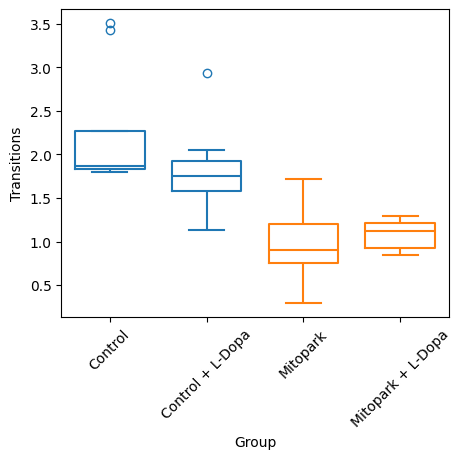

In [49]:
#Plot basic parameters using seaborn

import seaborn as sns

figsize = (5,4)
fig, ax = plt.subplots(1, 1, figsize=figsize)
sns.boxplot(data=behav_struct, x='Group', y='Transitions', hue='Phenotype', gap=0.1, fill=False, ax=ax, legend=False)
ax.set_xticklabels(['Control', 'Control + L-Dopa', 'Mitopark', 'Mitopark + L-Dopa'], rotation=45)
#sns.stripplot(data=behav_struct, x='Group', y='Transitions', color=['blue','orange','orange','orange'], jitter=0.2, size=2.5, ax=ax)
#ax.set_ylabel('Transitions/sec')
save_analysis_figure(fig, 'Transitions', project_dir, model_name, save_dir=None)
#ax.set_ylim([0, 4])

In [52]:
#Calculate basic statistic using scipy

import scipy
from itertools import product

def calculate_stats(df, parameter):
    pvalues = []
    pvalue_asterisks = []
    x_values = df["Group"].unique()
    
    for x in product(x_values, x_values):
            stat, pvalue = scipy.stats.ttest_ind(
                df.loc[df["Group"] == x[0], parameter],
                df.loc[df["Group"] == x[1], parameter]
            )
            
            pvalues.append(pvalue)
    
    stars=dict(zip(product(x_values, x_values),pvalues))

    for key, value in stars.items():
        print(f"{key}: {value}")


calculate_stats(behav_struct, 'Local Entropy')

('Control', 'Control'): 1.0
('Control', 'Control + L-Dopa'): 0.9164438921666669
('Control', 'Mitopark'): 0.007512981363910605
('Control', 'Mitopark + L-Dopa'): 0.007599822304998058
('Control + L-Dopa', 'Control'): 0.9164438921666669
('Control + L-Dopa', 'Control + L-Dopa'): 1.0
('Control + L-Dopa', 'Mitopark'): 0.0019005189748941284
('Control + L-Dopa', 'Mitopark + L-Dopa'): 0.004766295378326426
('Mitopark', 'Control'): 0.007512981363910605
('Mitopark', 'Control + L-Dopa'): 0.0019005189748941284
('Mitopark', 'Mitopark'): 1.0
('Mitopark', 'Mitopark + L-Dopa'): 0.32081419634513497
('Mitopark + L-Dopa', 'Control'): 0.007599822304998058
('Mitopark + L-Dopa', 'Control + L-Dopa'): 0.004766295378326426
('Mitopark + L-Dopa', 'Mitopark'): 0.32081419634513497
('Mitopark + L-Dopa', 'Mitopark + L-Dopa'): 1.0
